# Importación de las librerias

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kstest, norm, ttest_ind, mannwhitneyu

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# Leer los datos

In [66]:
df = pd.read_csv("REG02_EPHC_ANUAL_2024.csv", sep=";")

/tmp/ipykernel_184551/3855890981.py:1: DtypeWarning: Columns (197,199,202,206,207,208,209,210,211) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("REG02_EPHC_ANUAL_2024.csv", sep=";")


In [67]:
df.head()

,UPM,NVIVI,NHOGA,AÑO,DPTO,AREA,L02,P02,P03,P04,...,ingrevasode,ingrealmuerzode,ipcm,pobrezai,pobnopoi,quintili,decili,quintiai,decilai,informalidad
0,14,3,1,2024,0,1,2,40,1,1,...,0,0,"4035459,49658286",3,0,5,10,5,9,2
1,14,3,1,2024,0,1,6,38,2,1,...,0,0,"4035459,49658286",3,0,5,10,5,9,1
2,14,15,1,2024,0,1,1,78,1,1,...,0,0,"1782061,06870229",3,0,4,7,3,6,
3,14,15,1,2024,0,1,2,77,2,1,...,0,0,"1782061,06870229",3,0,4,7,3,6,
4,14,23,1,2024,0,1,1,32,1,1,...,0,0,"5931717,5572519",3,0,5,10,5,10,1


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57744 entries, 0 to 57743
Columns: 213 entries, UPM to informalidad
dtypes: int64(25), object(188)
memory usage: 93.8+ MB


# Filtrado de datos

Para el analisis voy a utilizar las siguientes columnas

- Sexo: P06
    - 1: Hombre
    - 6: Mujer
- Edad: P02
- Nivel Educativo: ED0504
- Ocupación: OCUP_PEA
- Horas trabajadas: HORAB
- Zona (Urbana/Rural): AREA
    - 1: Urbana
    - 6: Rural
- Tipo de empleo: RAMA_PEA
- Departamento: DPTO
- Salario neto mensual: e01aimde

In [69]:
# Dataframe con solo las columnas necesarias
cols = ["P06", "P02", "ED0504", "OCUP_PEA", "HORAB", "AREA", "RAMA_PEA", "DPTO", "e01aimde"]
df = df[cols]

In [70]:
# Renombrar para que sea más legible
df = df.rename(columns={
    "P06": "genero",
    "P02": "edad",
    "ED0504": "nivel_educativo",
    "OCUP_PEA": "ocupacion",
    "HORAB": "horas_trabajadas",
    "AREA": "zona",
    "RAMA_PEA": "tipo_empleo",
    "DPTO": "departamento",
    "e01aimde": "salario_neto"
})

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57744 entries, 0 to 57743
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   genero            57744 non-null  int64 
 1   edad              57744 non-null  int64 
 2   nivel_educativo   57744 non-null  object
 3   ocupacion         57744 non-null  object
 4   horas_trabajadas  57744 non-null  object
 5   zona              57744 non-null  int64 
 6   tipo_empleo       57744 non-null  object
 7   departamento      57744 non-null  int64 
 8   salario_neto      57744 non-null  object
dtypes: int64(4), object(5)
memory usage: 4.0+ MB


In [72]:
# Convertir directamente a numérico sin eliminar valores válidos
df["salario_neto"] = pd.to_numeric(df["salario_neto"], errors="coerce")
df["horas_trabajadas"] = pd.to_numeric(df["horas_trabajadas"], errors="coerce")

In [73]:
df.head()

,genero,edad,nivel_educativo,ocupacion,horas_trabajadas,zona,tipo_empleo,departamento,salario_neto
0,1,40,606,8,55.0,1,5,0,NaN
1,6,38,903,9,56.0,1,7,0,NaN
2,1,78,306,,NaN,1,,0,0.0
3,6,77,606,,NaN,1,,0,0.0
4,1,32,2401,5,58.0,1,5,0,NaN


In [74]:
# Verificar cambios
df[["salario_neto", "horas_trabajadas"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57744 entries, 0 to 57743
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   salario_neto      34991 non-null  float64
 1   horas_trabajadas  29079 non-null  float64
dtypes: float64(2)
memory usage: 902.4 KB


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57744 entries, 0 to 57743
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genero            57744 non-null  int64  
 1   edad              57744 non-null  int64  
 2   nivel_educativo   57744 non-null  object 
 3   ocupacion         57744 non-null  object 
 4   horas_trabajadas  29079 non-null  float64
 5   zona              57744 non-null  int64  
 6   tipo_empleo       57744 non-null  object 
 7   departamento      57744 non-null  int64  
 8   salario_neto      34991 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 4.0+ MB


In [77]:
# Filtrar solo quienes tienen salario válido y positivo
df = df[df["salario_neto"] > 0]

In [78]:
df.shape
df

,genero,edad,nivel_educativo,ocupacion,horas_trabajadas,zona,tipo_empleo,departamento,salario_neto
96,1,56,503,1,42.0,1,6,0,4500000.0
98,1,40,2405,1,66.0,1,5,0,3750000.0
101,1,36,1003,3,40.0,1,8,0,3000000.0
105,1,31,306,9,72.0,1,8,0,2000000.0
106,1,25,409,9,72.0,1,8,0,2000000.0
...,...,...,...,...,...,...,...,...,...
57684,1,40,306,9,44.0,6,1,15,1800000.0
57687,6,42,2406,2,30.0,6,8,15,12602000.0
57688,1,42,2301,3,70.0,6,1,15,10000000.0
57692,1,43,2103,1,40.0,6,8,15,3500000.0


### Transformar salario neto a variable categórica

In [79]:
# Crear variable objetivo: nivel salarial
df["nivel_salarial"] = pd.qcut(df["salario_neto"], q=3, labels=["bajo", "medio", "alto"])

/tmp/ipykernel_184551/2284214188.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["nivel_salarial"] = pd.qcut(df["salario_neto"], q=3, labels=["bajo", "medio", "alto"])


In [80]:
# Ver distribución
df["nivel_salarial"].value_counts()

nivel_salarial
medio    1518
bajo     1289
alto     1059
Name: count, dtype: int64

# Preparación para entrenamiento de modelos

In [82]:
# Variables predictoras y objetivo
X = df.drop(columns=["salario_neto", "nivel_salarial"])
y = df["nivel_salarial"]

In [84]:
# Identificar columnas categóricas y numéricas
cat_cols = ["genero", "nivel_educativo", "ocupacion", "zona", "tipo_empleo", "departamento"]
num_cols = ["edad", "horas_trabajadas"]

In [85]:
# Preprocesamiento: One-Hot para categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
        ("num", "passthrough", num_cols)
    ]
)

In [86]:
# Dividir en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Regresión Logística Multinomial

/home/diegao/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/diegao/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Reporte de Clasificación:

              precision    recall  f1-score   support

        alto       0.67      0.52      0.58       318
        bajo       0.68      0.68      0.68       387
       medio       0.55      0.64      0.59       455

    accuracy                           0.62      1160
   macro avg       0.63      0.61      0.62      1160
weighted avg       0.63      0.62      0.62      1160



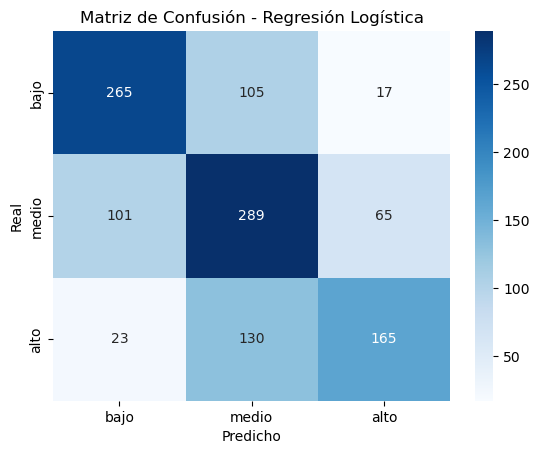

In [87]:
# Crear pipeline con el preprocesador y el modelo
model_log = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000, multi_class="multinomial"))
])

# Entrenar
model_log.fit(X_train, y_train)

# Predecir
y_pred = model_log.predict(X_test)

# Evaluar
print("Reporte de Clasificación:\n")
print(classification_report(y_test, y_pred))

# Matriz de confusión
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred, labels=["bajo", "medio", "alto"])
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["bajo", "medio", "alto"],
            yticklabels=["bajo", "medio", "alto"])
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Regresión Logística")
plt.show()


# Random Forest

Reporte de Clasificación - Random Forest:

              precision    recall  f1-score   support

        alto       0.66      0.57      0.61       318
        bajo       0.72      0.70      0.71       387
       medio       0.56      0.63      0.59       455

    accuracy                           0.64      1160
   macro avg       0.65      0.63      0.64      1160
weighted avg       0.64      0.64      0.64      1160



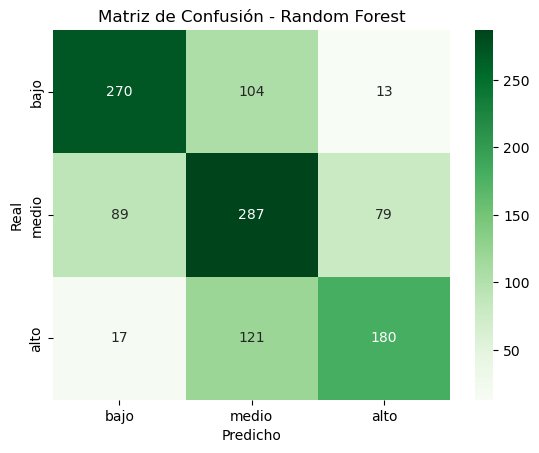

In [89]:
# Crear pipeline con preprocesamiento + Random Forest
model_rf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(
        n_estimators=200,
        max_depth=None,
        random_state=42
    ))
])

# Entrenar
model_rf.fit(X_train, y_train)

# Predecir
y_pred_rf = model_rf.predict(X_test)

# Evaluar
print("Reporte de Clasificación - Random Forest:\n")
print(classification_report(y_test, y_pred_rf))

# Matriz de confusión
cm_rf = confusion_matrix(y_test, y_pred_rf, labels=["bajo", "medio", "alto"])
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens",
            xticklabels=["bajo", "medio", "alto"],
            yticklabels=["bajo", "medio", "alto"])
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Random Forest")
plt.show()

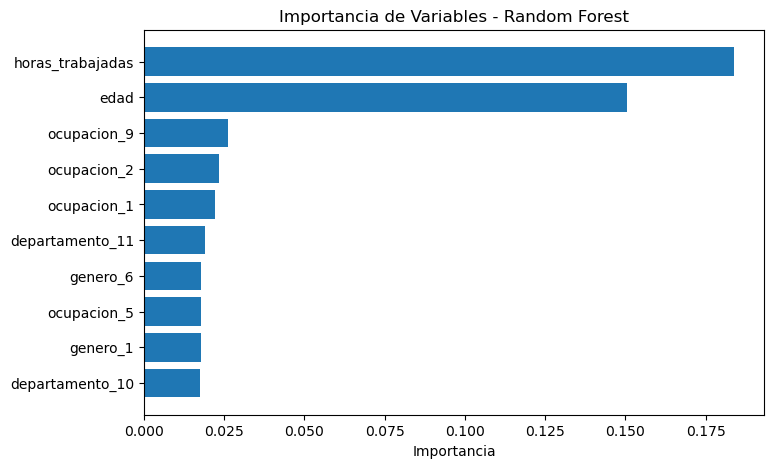

In [90]:
# Obtener el modelo RandomForest entrenado
rf = model_rf.named_steps["classifier"]

# Obtener los nombres de las columnas del preprocesamiento
encoder = model_rf.named_steps["preprocessor"].named_transformers_["cat"]
encoded_cat_names = encoder.get_feature_names_out(cat_cols)
all_feature_names = np.concatenate([encoded_cat_names, num_cols])

# Importancias
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Mostrar las 10 más importantes
plt.figure(figsize=(8,5))
plt.barh(range(10), importances[indices][:10][::-1])
plt.yticks(range(10), [all_feature_names[i] for i in indices[:10]][::-1])
plt.xlabel("Importancia")
plt.title("Importancia de Variables - Random Forest")
plt.show()